In [1]:
import pandas as pd
import numpy as np
import time
from os import walk
import h5py
names = ['times','sms_in','sms_out','call_in','call_out','traffic']

/home/hyf/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### overview of data

In [8]:
dataall = h5py.File('../data/processed/internet_t10_s3030_4070.h5','r')
data = dataall['data'].value
data = np.sum(data,axis = 0)

In [9]:
dataall['data'].shape

(8928, 1, 30, 30)

In [10]:
#from mpl_toolkits.mplt3d import Axes3D
import importlib
importlib.import_module('mpl_toolkits.mplot3d').__path__
import matplotlib.pyplot as plt
import numpy as np

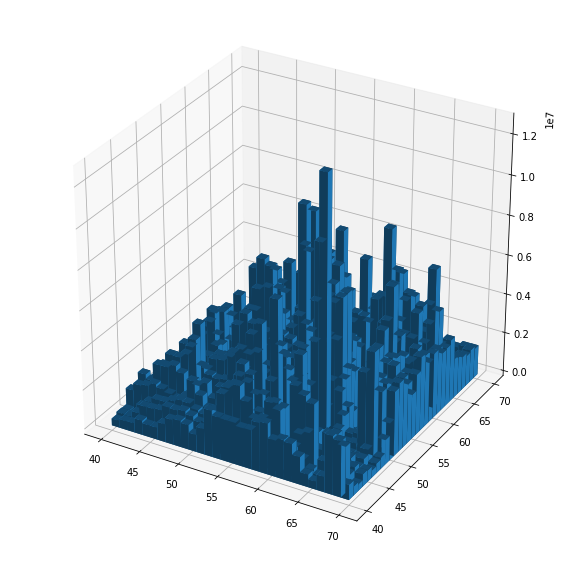

In [11]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
_x = np.arange(40,70)
_y = np.arange(40,70)
xx,yy = np.meshgrid(_x,_y)
x,y = xx.ravel(), yy.ravel()
top = data.ravel()
bottom = np.zeros_like(top)
ax.bar3d(x,y,bottom,1,1,top,shade = True)

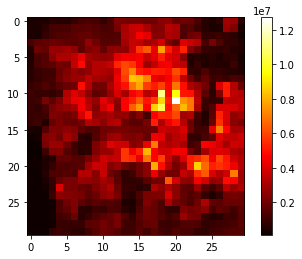

In [40]:
fig, ax = plt.subplots()
im = ax.imshow(data[0],cmap="hot")
fig.colorbar(im)

In [28]:
d = np.squeeze(dataall['data'].value)
d = np.reshape(d,(8928,900))
d = d.T

In [34]:
np.argwhere(d == grid1tra)

array([[516,   0]])

In [46]:
demo = pd.Series(d[516])

In [51]:
144*7

1008

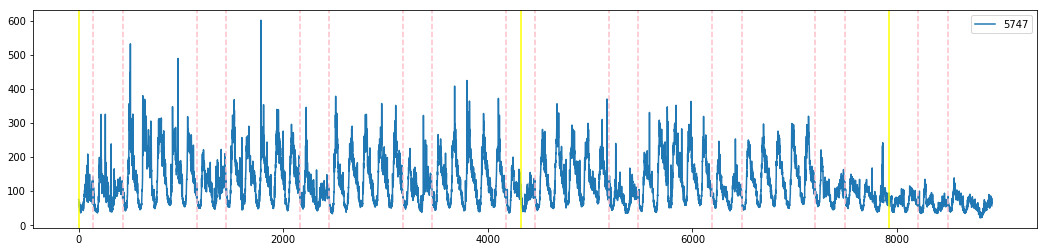

In [68]:
demo.plot(figsize =(18,4),legend=True,label=str(grid1no),use_index = True)
plt.axvline(0,color='yellow')
plt.axvline(4320,color='yellow')
plt.axvline(8928-144*7,color='yellow')
for i in range(0,len(demo),1008):
    plt.axvline(i+144,color='pink',linestyle='--')
    plt.axvline(i+144+288,color='pink',linestyle='--')

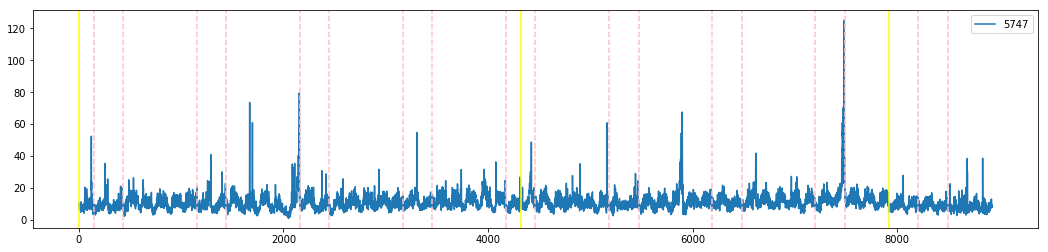

In [74]:
demo2 = pd.Series(d[510])
demo2.plot(figsize =(18,4),legend=True,label=str(grid1no),use_index = True)
plt.axvline(0,color='yellow')
plt.axvline(4320,color='yellow')
plt.axvline(8928-144*7,color='yellow')
for i in range(0,len(demo),1008):
    plt.axvline(i+144,color='pink',linestyle='--')
    plt.axvline(i+144+288,color='pink',linestyle='--')

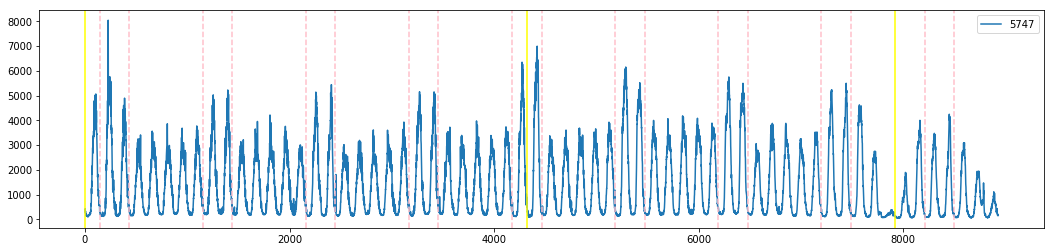

In [75]:
demo2 = pd.Series(d[350])
demo2.plot(figsize =(18,4),legend=True,label=str(grid1no),use_index = True)
plt.axvline(0,color='yellow')
plt.axvline(4320,color='yellow')
plt.axvline(8928-144*7,color='yellow')
for i in range(0,len(demo),1008):
    plt.axvline(i+144,color='pink',linestyle='--')
    plt.axvline(i+144+288,color='pink',linestyle='--')

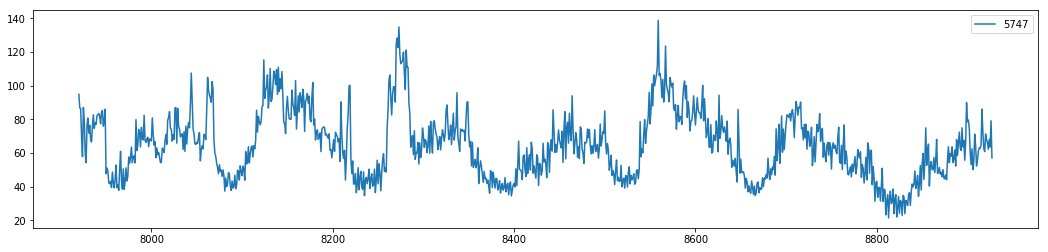

In [48]:
#最后一周
demo[-144*7:].plot(figsize =(18,4),legend=True,label=str(grid1no),use_index = True)

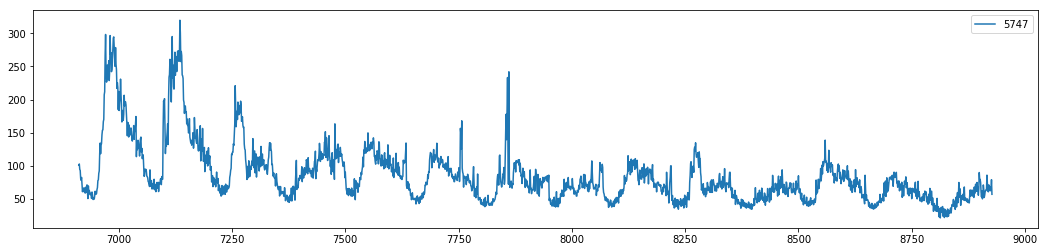

In [49]:
demo[-144*14:].plot(figsize =(18,4),legend=True,label=str(grid1no),use_index = True)

In [117]:
grid1tra = grid1.traffic.values

In [118]:
grid1tra

array([ 75.04576165,  74.24859021,  67.47916564, ..., 146.89023646,
       131.27898389, 105.33452223])

In [ ]:
data.shape

In [124]:
data[10:20,0:9]

array([[ 58.88591478,  51.10883408, 176.3817988 ,  58.51765493,
         47.1647839 ,  47.1647839 , 109.69616023, 175.99656155,
        137.8358409 ],
       [ 64.50434898,  56.14342462,  67.65385392,  52.31109525,
         46.2905927 ,  46.2905927 , 106.47769204, 169.55566292,
        130.04017808],
       [ 70.00480735,  56.76832042,  56.63427274,  53.91035749,
         47.48643568,  47.48643568, 111.64933816, 178.48409496,
        131.98396863],
       [ 67.5150763 ,  53.67632477,  59.24391325,  50.81598127,
         45.6327057 ,  45.6327057 ,  83.37235283, 123.62578384,
        106.61827821],
       [ 60.65390276,  50.37899853,  62.56318827,  44.2633785 ,
         37.33513006,  37.33513006,  68.44730971, 102.39614136,
        100.63093887],
       [ 55.479906  ,  46.36189802,  58.2145927 ,  48.94887099,
         42.16507382,  42.16507382, 125.8868463 , 212.62317536,
        143.69116346],
       [ 61.72543041,  47.42788148,  59.68287912,  45.48563215,
         41.27629917,  41.2762

In [ ]:
np.where(data.T==grid1tra[0])

## ==========================================================

In [22]:
grid1no = 57*100+47
grid2no = 50*100+60
grid3no = 69*100+69

In [23]:
dir_ = '../data/interim/gridTraffic_Nov_all'
#grid1 = pd.read_csv('{}/grid{}.csv'.format(dir_,1))
grid1 = pd.read_csv('{}/grid{}.csv'.format(dir_,grid1no),names = names)
grid2 = pd.read_csv('{}/grid{}.csv'.format(dir_,grid2no),names = names)
grid3 = pd.read_csv('{}/grid{}.csv'.format(dir_,grid3no),names = names)
grid1['time'] = grid1['times'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(x//1000)))
grid2['time'] = grid2['times'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(x//1000)))
grid3['time'] = grid3['times'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(x//1000)))

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline 

## traffic

**每日网络流量活动呈现出明显的周期性**

**所以可以考虑 周期性的规律变化**

**中心地带的变化较为明显，波动较大**

In [91]:
len(grid1)

4320

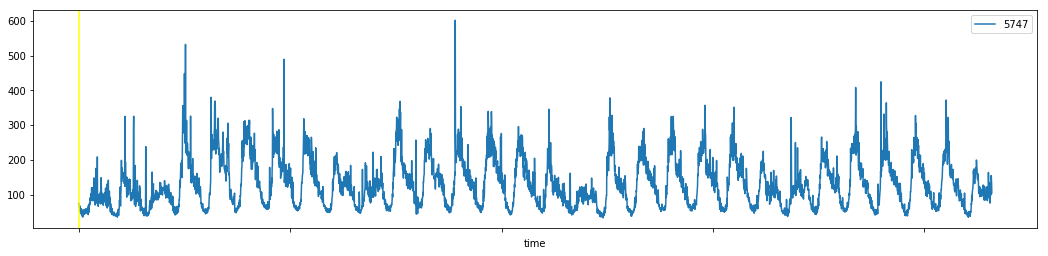

In [101]:
grid1.set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label=str(grid1no),use_index = True)
plt.axvline(0,color='yellow')

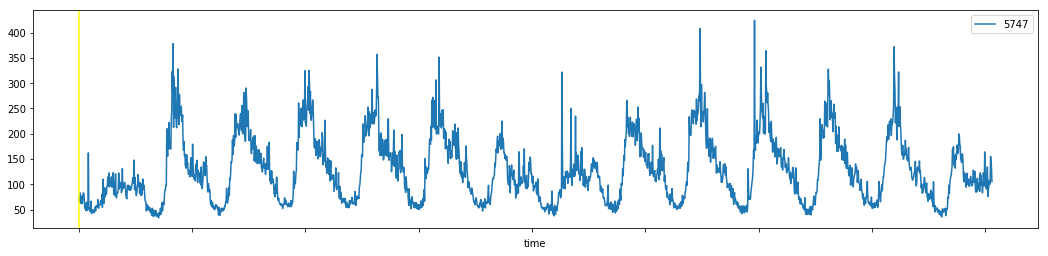

In [102]:
#最后2周
grid1[-144*14:].set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label=str(grid1no),use_index = True)
plt.axvline(0,color='yellow')

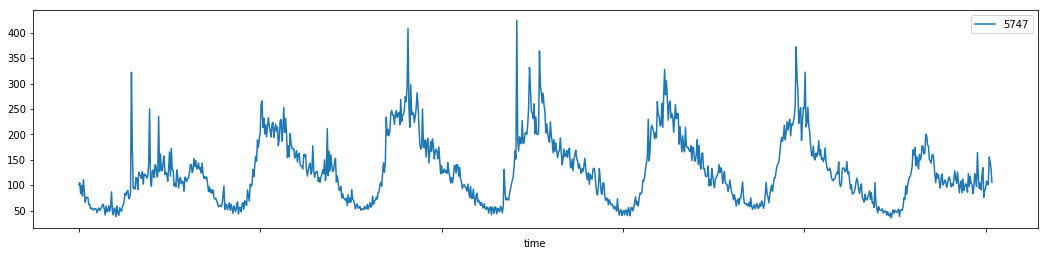

In [80]:
#最后一周
grid1[-144*7:].set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label=str(grid1no),use_index = True)

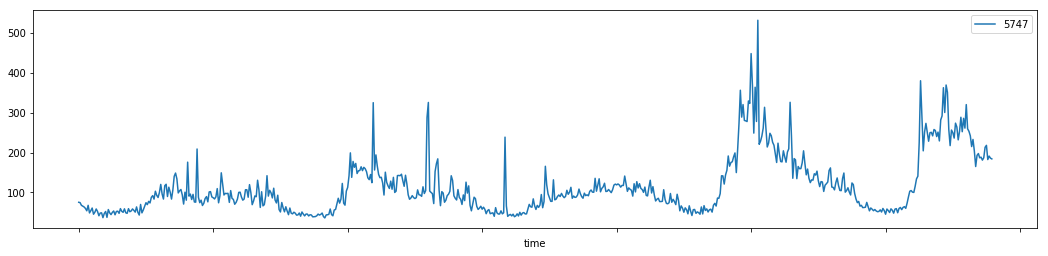

In [44]:
grid1[:680].set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label=str(grid1no),use_index = True)

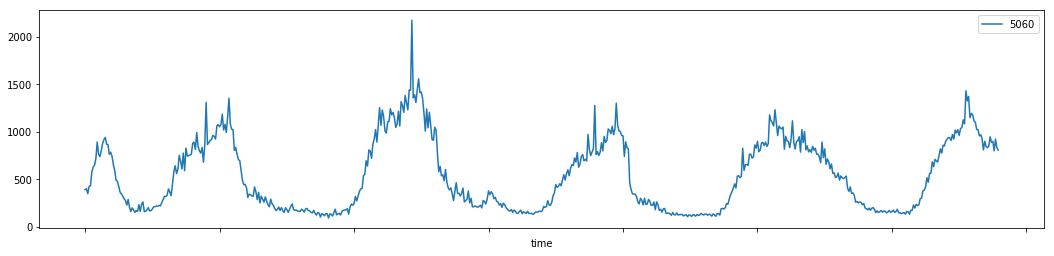

In [45]:
grid2[:680].set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label=str(grid2no))

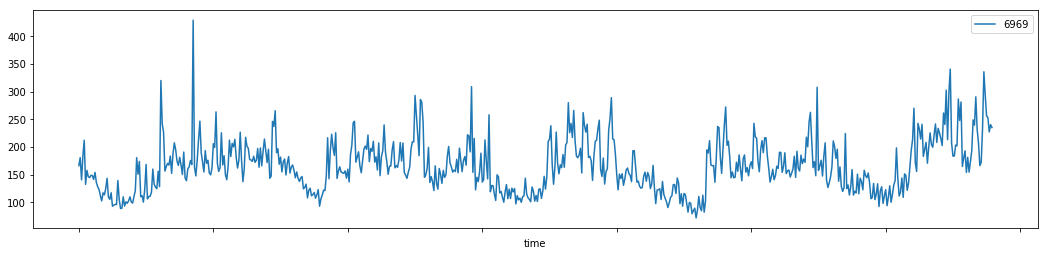

In [46]:
grid3[:680].set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label=str(grid3no))

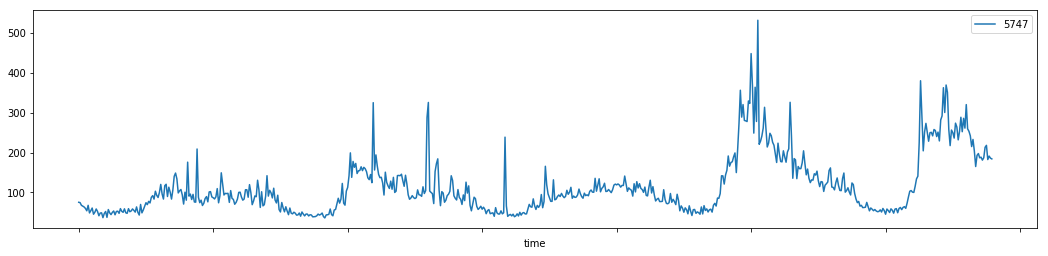

In [47]:
grid1[:680].set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label=str(grid1no))

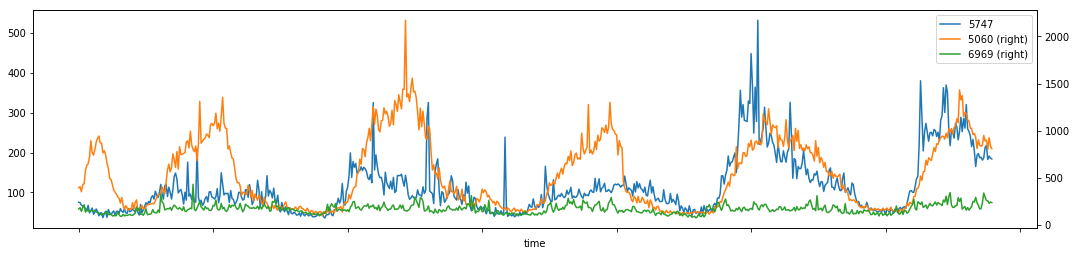

In [48]:
grid1[:680].set_index('time')['traffic'].plot(figsize =(18,4),legend=True,label=str(grid1no))
grid2[:680].set_index('time')['traffic'].plot(legend=True,label=str(grid2no),secondary_y=True)
grid3[:680].set_index('time')['traffic'].plot(legend=True,label=str(grid3no),secondary_y=True)
#grid2499[:680].set_index('time')['traffic'].plot(legend=True,label='grid2499')

## sms_in

**在中心地带，周末的收短信峰值低于平日**

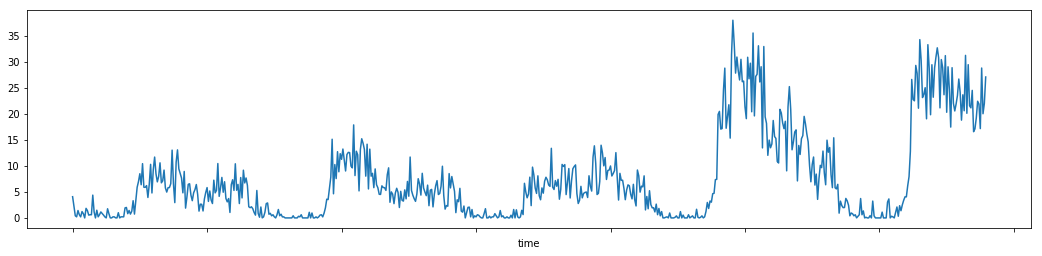

In [49]:
grid1[:680].set_index('time')['sms_in'].plot(figsize =(18,4))

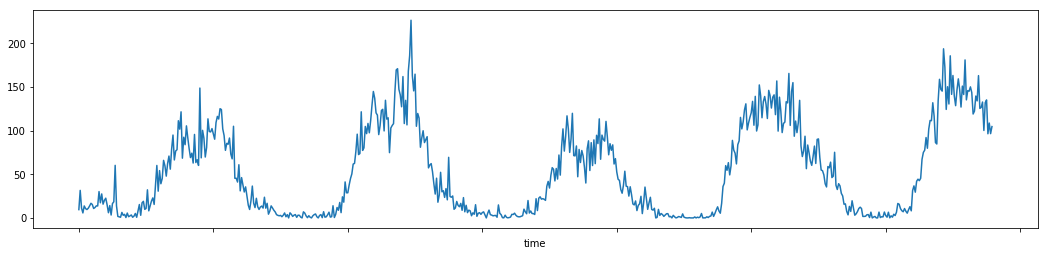

In [51]:
grid2[:680].set_index('time')['sms_in'].plot(figsize =(18,4))

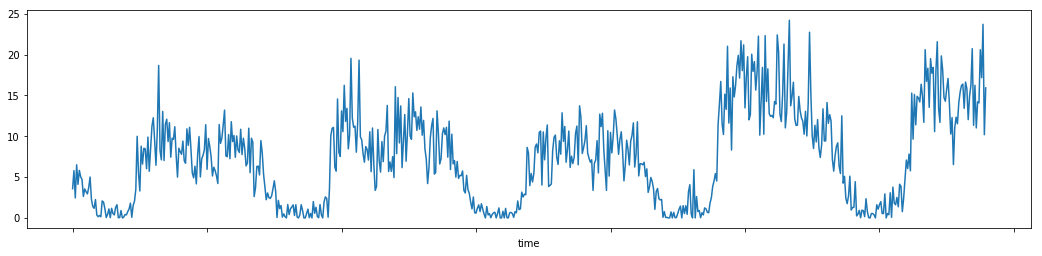

In [52]:
grid3[:680].set_index('time')['sms_in'].plot(figsize =(18,4))

## sms_out

**无明显发现**

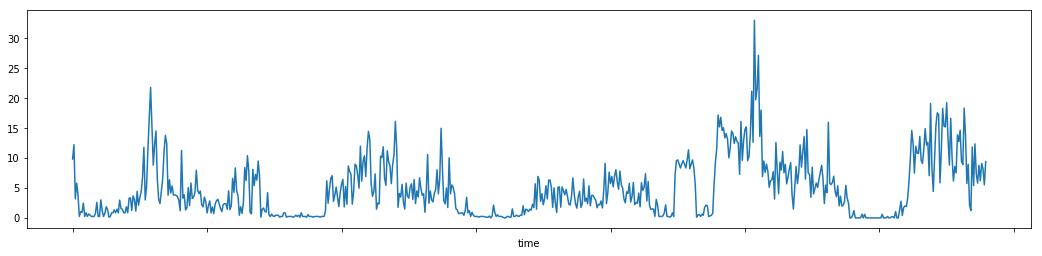

In [53]:
grid1[:680].set_index('time')['sms_out'].plot(figsize =(18,4))

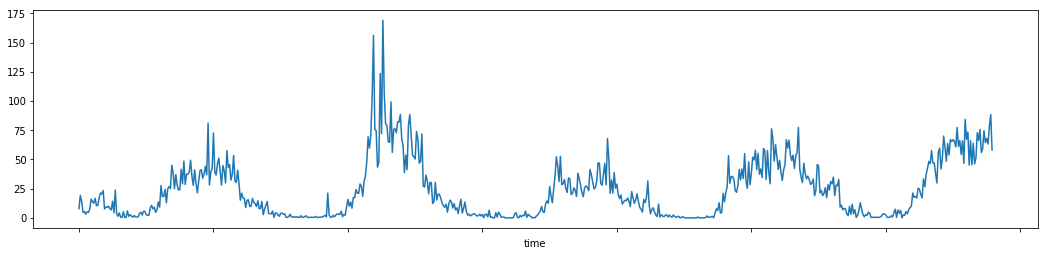

In [54]:
grid2[:680].set_index('time')['sms_out'].plot(figsize =(18,4))

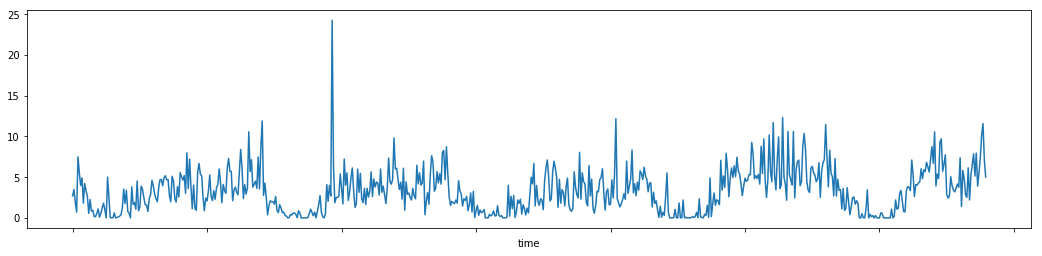

In [55]:
grid3[:680].set_index('time')['sms_out'].plot(figsize =(18,4))

## call_in

**周末呼入少于工作日呼入**

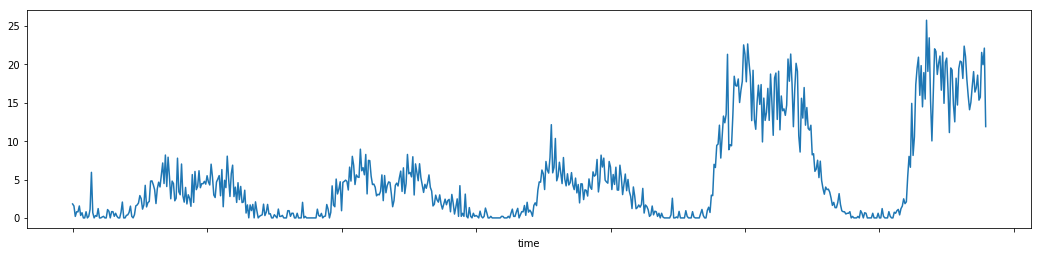

In [56]:
grid1[:680].set_index('time')['call_in'].plot(figsize =(18,4))

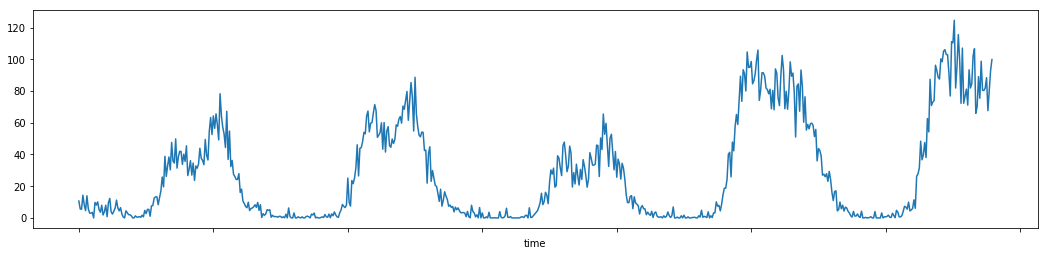

In [57]:
grid2[:680].set_index('time')['call_in'].plot(figsize =(18,4))

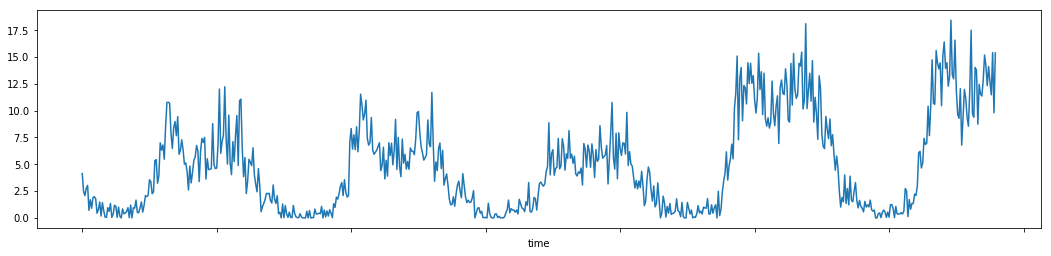

In [58]:
grid3[:680].set_index('time')['call_in'].plot(figsize =(18,4))

## call_out

**同样，周末呼出少于工作日呼出**

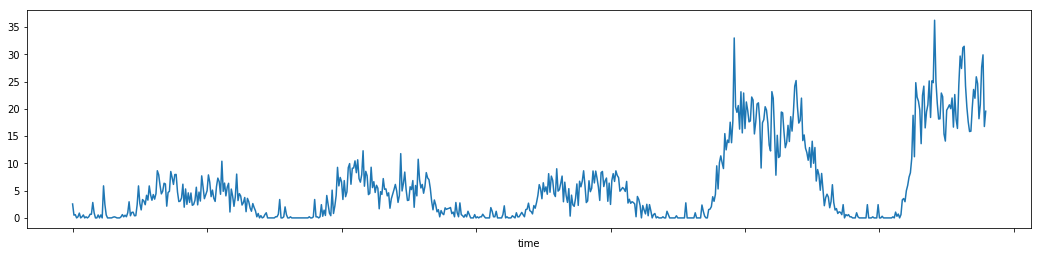

In [59]:
grid1[:680].set_index('time')['call_out'].plot(figsize =(18,4))

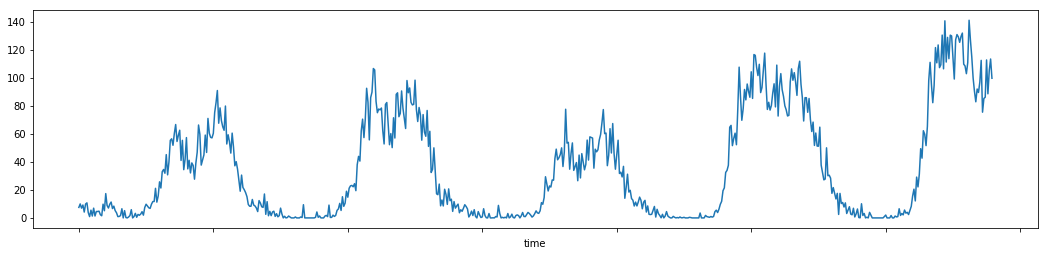

In [60]:
grid2[:680].set_index('time')['call_out'].plot(figsize =(18,4))

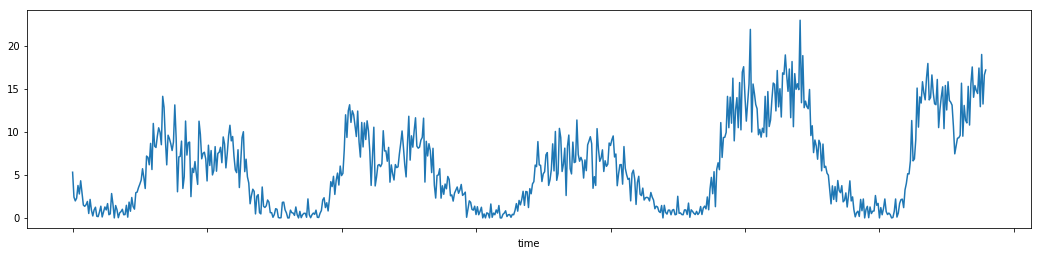

In [61]:
grid3[:680].set_index('time')['call_out'].plot(figsize =(18,4))

## call and internet

**从数据可以看出，网络活跃时间会比通话时间持续稍长，滞后**

**所以可考虑用前面时刻的通话数据来预测流量**

**通话强度在周末稍弱，网络强度基本一致**

In [1]:
for i in range(10000):
    c = i % 100
    r = i //100
    if 40 <= c < 70 and 40 <= r < 70:
        print(i+1)

4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660


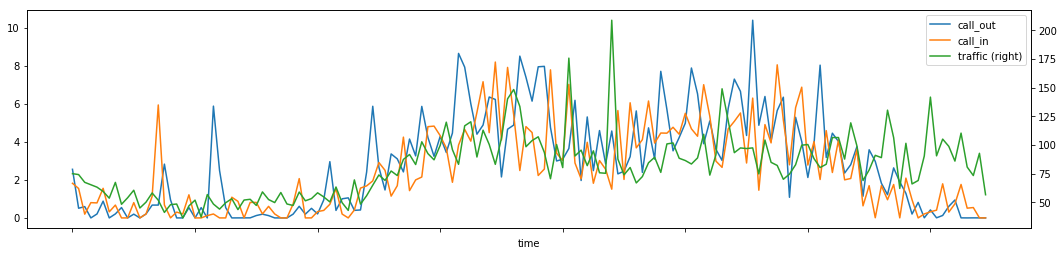

In [78]:
grid1[:150].set_index('time')[['call_out','call_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

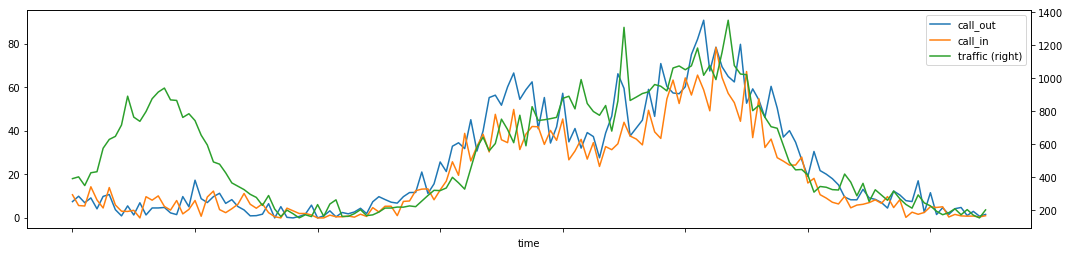

In [63]:
grid2[:150].set_index('time')[['call_out','call_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

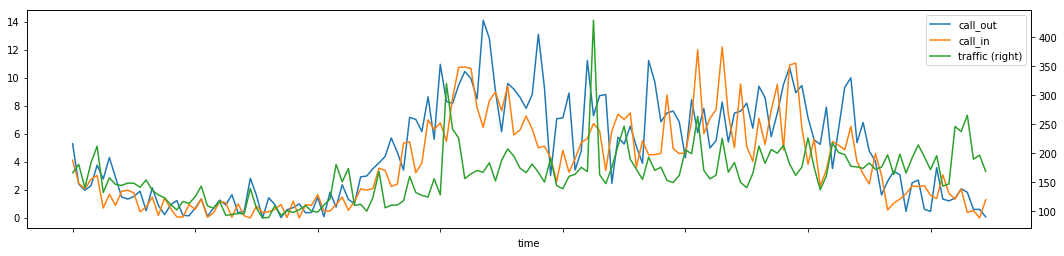

In [64]:
grid3[:150].set_index('time')[['call_out','call_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

## sms and internet

**从数据看不出sms和traffic之间的显著关系**

**所以sms对traffic的影响应该是地区相关的**

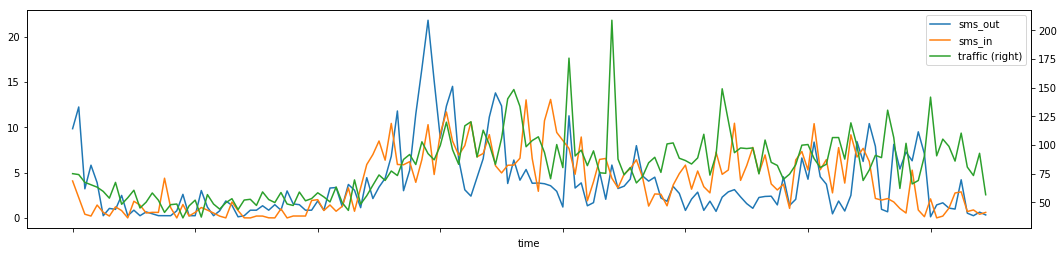

In [65]:
grid1[:150].set_index('time')[['sms_out','sms_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

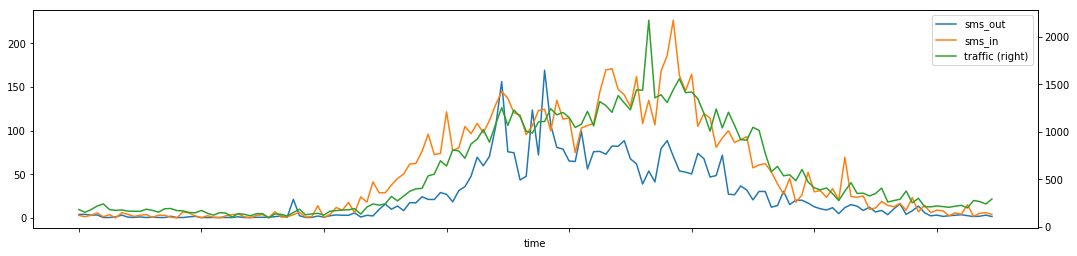

In [80]:
grid2[150:300].set_index('time')[['sms_out','sms_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

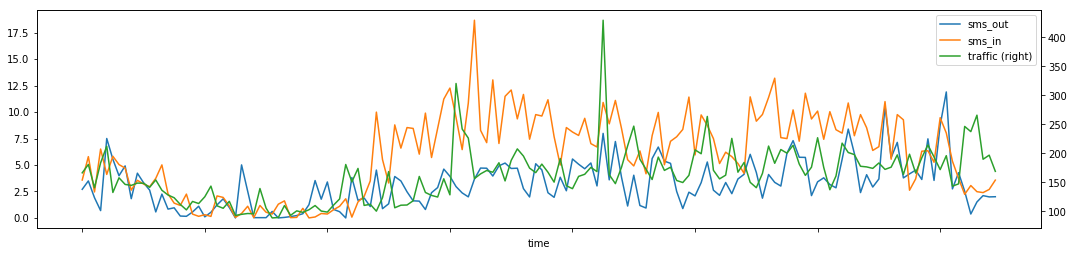

In [67]:
grid3[:150].set_index('time')[['sms_out','sms_in','traffic']].plot(figsize =(18,4),secondary_y=['traffic'])

## call_in and call_out

**呼入呼出的曲线基本一致**

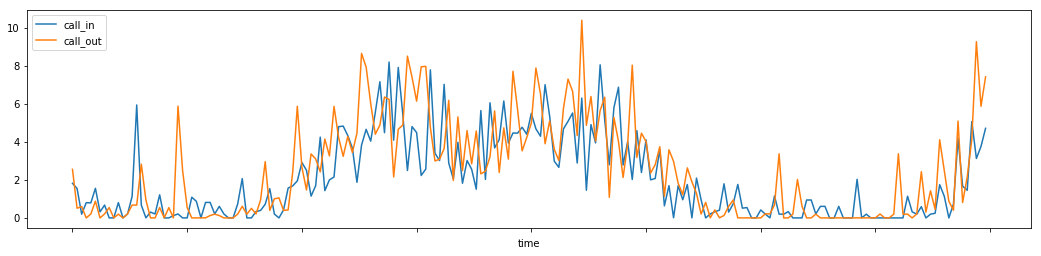

In [68]:
grid1[:200].set_index('time')[['call_in','call_out']].plot(figsize =(18,4))

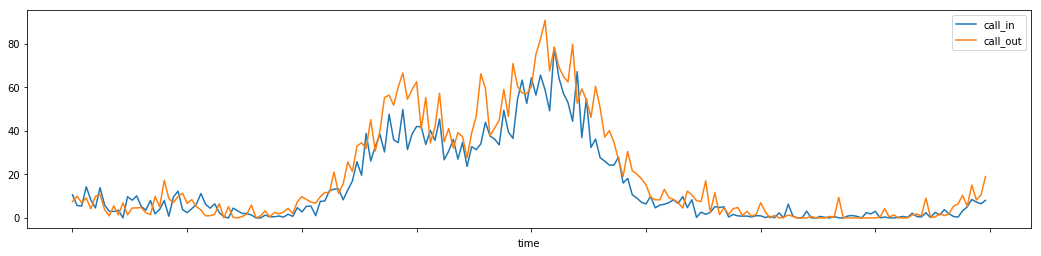

In [69]:
grid2[:200].set_index('time')[['call_in','call_out']].plot(figsize =(18,4))

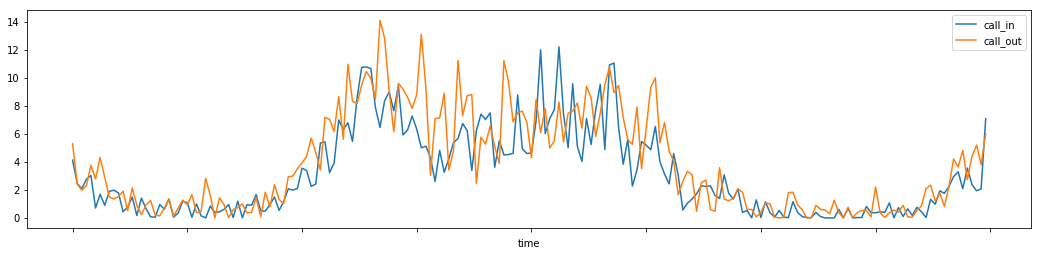

In [70]:
grid3[:200].set_index('time')[['call_in','call_out']].plot(figsize =(18,4))
#grid2499[:200].set_index('time')[['call_in','call_out']].plot(figsize =(18,4))